# Open NASA APIs

The National Aeronautics and Space Administration (NASA) has a variety of application program interfaces (API) that are available for free. An API is basically a set of functions, routines, protocols, and tools for interfacing with software applications.

To use the NASA APIs you will need an `API key`. This is just an automatically generated token that tells the API service that you are registered in their database. It's just a way to moderate and track who is using the service.

Go to: https://api.nasa.gov/ and get an `API key`. The `API key` will be sent to your e-mail for later access. You can always generate a new key.

Among the cool stuff you can do is retreive weather data for Mars, images of the Moon and Mars, and even track the position of the International Space Station, which is orbiting about 150 miles above your head.

Make sure you also check the NASA Open Data portal for data, code, and research results: https://open.nasa.gov/open-data/


In [1]:
# Import modules
import urllib, json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pprint as pp


## InSight: Mars Weather Service API

Source: This API is maintained and provided by NASA Jet Propulsion Laboratory and Cornell University. The rate limit for this API is every hour no more than 2000 hits for each individual IP.

You should definitely check https://mars.nasa.gov/insight/weather/

Here is a document explaining the Mars weather API in greater detail [Link](https://api.nasa.gov/assets/insight/InSight%20Weather%20API%20Documentation.pdf)

Before moving forward, we need to realize that weather data is reported in **Martian days, which are called Sol**. The API also provides the Earth time for the start and end of each Sol in case we need this information.



In [2]:
# Define API key (mine may no longr work)
api_key = 'i5F5nXlfikLPVMfd69rw4bNqHgKu23MPMaSpK27N'
api_root = 'https://api.nasa.gov/'
api_product = 'insight_weather/?'
url = api_root + api_product + 'feedtype=json&ver=1.0' + '&' + 'api_key=' + api_key


In [3]:
# Request weather data
json_url = urllib.request.urlopen(url)
data = json.loads(json_url.read())

# The dataset is long. Let's get the object keys first
obj_keys = data['sol_keys']
print(obj_keys)


['443', '444', '445', '446', '447', '448', '449']


In [4]:
# Now that we have the keys we can inspect the day of our choice.
# This is just to avoid dumping a ton of data in ur notebook.

pp.pprint(data[obj_keys[-1]])

{'AT': {'av': -57.232, 'ct': 295176, 'mn': -93.581, 'mx': -11.266},
 'First_UTC': '2020-03-01T13:25:36Z',
 'HWS': {'av': 6.753, 'ct': 98453, 'mn': 0.267, 'mx': 23.871},
 'Last_UTC': '2020-03-02T14:05:10Z',
 'PRE': {'av': 631.529, 'ct': 106238, 'mn': 603.6497, 'mx': 653.9903},
 'Season': 'summer',
 'WD': {'0': {'compass_degrees': 0.0,
              'compass_point': 'N',
              'compass_right': 0.0,
              'compass_up': 1.0,
              'ct': 277},
        '1': {'compass_degrees': 22.5,
              'compass_point': 'NNE',
              'compass_right': 0.382683432365,
              'compass_up': 0.923879532511,
              'ct': 173},
        '10': {'compass_degrees': 225.0,
               'compass_point': 'SW',
               'compass_right': -0.707106781187,
               'compass_up': -0.707106781187,
               'ct': 4543},
        '11': {'compass_degrees': 247.5,
               'compass_point': 'WSW',
               'compass_right': -0.923879532511,
        

In [6]:
# Let's to get a single value
last_sol_avg_temp = data[obj_keys[-1]]['AT']['av']
print(last_sol_avg_temp,'degrees Celsius')


-57.232 degrees Celsius


In [7]:
# Let's try to get the average temperature values for all days
avg_temp = []
sol = []
for key in data['sol_keys']:
    sol.append(float(key))
    avg_temp.append(data[key]['AT']['av'])

print(sol)
print(avg_temp)


[443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0]
[-61.32, -67.186, -64.969, -55.896, -59.704, -64.773, -57.232]


In [8]:
# Let's try a more concise way of extracting data using list comprehensions
print([data[key]['AT']['av'] for key in data['sol_keys']])


[-61.32, -67.186, -64.969, -55.896, -59.704, -64.773, -57.232]


In [9]:
# Now we can extract multiple variables with one-line commands
min_temp = [data[key]['AT']['mn'] for key in data['sol_keys']]
avg_temp = [data[key]['AT']['av'] for key in data['sol_keys']]
max_temp = [data[key]['AT']['mx'] for key in data['sol_keys']]


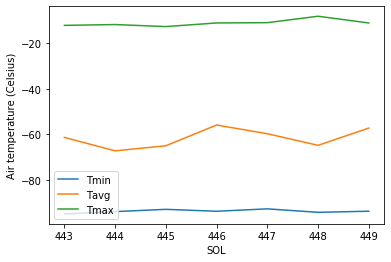

In [10]:
# Plot some time series of air temperature
plt.plot(sol,min_temp)
plt.plot(sol,avg_temp)
plt.plot(sol,max_temp)
plt.legend(['Tmin','Tavg','Tmax'], loc='lower left')
plt.xlabel('SOL')
plt.ylabel('Air temperature (Celsius)')
plt.show()


## NASA Rover Photos API


In [11]:
api_mars_photos = 'mars-photos/api/v1/rovers/curiosity/photos?'
url = api_root + api_mars_photos + 'sol=1000' + '&' + 'camera=chemcam' + '&' + '&api_key=' + api_key

json_url = urllib.request.urlopen(url)
data = json.loads(json_url.read())

pp.pprint(data)

{'photos': [{'camera': {'full_name': 'Chemistry and Camera Complex',
                        'id': 23,
                        'name': 'CHEMCAM',
                        'rover_id': 5},
             'earth_date': '2015-05-30',
             'id': 411632,
             'img_src': 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01000/opgs/edr/ccam/CR0_486264264EDR_F0481570CCAM02000M_.JPG',
             'rover': {'cameras': [{'full_name': 'Front Hazard Avoidance '
                                                 'Camera',
                                    'name': 'FHAZ'},
                                   {'full_name': 'Navigation Camera',
                                    'name': 'NAVCAM'},
                                   {'full_name': 'Mast Camera', 'name': 'MAST'},
                                   {'full_name': 'Chemistry and Camera Complex',
                                    'name': 'CHEMCAM'},
                                   {'full_name': 'Mars H

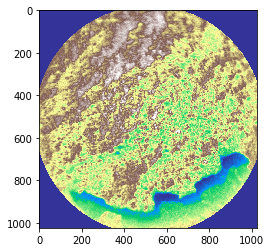

In [14]:
# Display an image using the URL
RGB = mpimg.imread('https://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01000/soas/rdr/ccam/CR0_486263086PRC_F0481570CCAM02000L1.PNG')
plt.imshow(RGB, cmap="terrain")
plt.show()


## International Space Station API

A simple API to request the current location of the International Space Station.

Yu can read more about NASA's open science initiative here: https://open.nasa.gov/blog/nasa-open-data-highlight-iss-live/